# Preprocessed Data

In [36]:
! pip install keras

In [37]:
# import necessary libraries

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from scipy.optimize import minimize
from sklearn.impute import SimpleImputer


# Load dataset
data_path = '/content/preprocessed_data 1.csv'
df = pd.read_csv(data_path)

# Drop the 'Datex' column
df = df.drop(columns=['Date_x', 'Ticker'])

# Checking the data
print(df.head())

       Open      High       Low     Close  Adj Close    Volume     Beta  \
0 -0.527490 -0.528801 -0.526355 -0.527421  -0.529219 -0.177086 -0.33756   
1 -0.527319 -0.528716 -0.526527 -0.527676  -0.529440 -0.103929 -0.33756   
2 -0.527745 -0.529055 -0.526527 -0.527847  -0.529587 -0.133960 -0.33756   
3 -0.527831 -0.529139 -0.526871 -0.527761  -0.529513  0.027768 -0.33756   
4 -0.528257 -0.528885 -0.526871 -0.527506  -0.529293  0.073270 -0.33756   

   P/E Ratio    Market Cap  52 Week High  ...       PC1       PC2       PC3  \
0    1.03557  5.317283e+10          3.41  ... -1.746289 -1.285688  0.711104   
1    1.03557  5.317283e+10          3.41  ... -1.746289 -1.285688  0.711104   
2    1.03557  5.317283e+10          3.41  ... -1.746289 -1.285688  0.711104   
3    1.03557  5.317283e+10          3.41  ... -1.746289 -1.285688  0.711104   
4    1.03557  5.317283e+10          3.41  ... -1.746289 -1.285688  0.711104   

   Month  DayOfWeek  Daily_Return  MA20  MA50  Log_PE_Ratio  Log_PEG_Ratio

# K-Means Clustering

In [40]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Beta,P/E Ratio,Market Cap,52 Week High,...,PC1,PC2,PC3,Month,DayOfWeek,Daily_Return,MA20,MA50,Log_PE_Ratio,Log_PEG_Ratio
0,-0.527490,-0.528801,-0.526355,-0.527421,-0.529219,-0.177086,-0.33756,1.03557,5.317283e+10,3.41,...,-1.746289,-1.285688,0.711104,1,3,-0.000131,NaN,NaN,0.710776,-0.2276
1,-0.527319,-0.528716,-0.526527,-0.527676,-0.529440,-0.103929,-0.33756,1.03557,5.317283e+10,3.41,...,-1.746289,-1.285688,0.711104,1,4,0.000677,NaN,NaN,0.710776,-0.2276
2,-0.527745,-0.529055,-0.526527,-0.527847,-0.529587,-0.133960,-0.33756,1.03557,5.317283e+10,3.41,...,-1.746289,-1.285688,0.711104,1,0,0.000192,NaN,NaN,0.710776,-0.2276
3,-0.527831,-0.529139,-0.526871,-0.527761,-0.529513,0.027768,-0.33756,1.03557,5.317283e+10,3.41,...,-1.746289,-1.285688,0.711104,1,1,-0.000131,NaN,NaN,0.710776,-0.2276
4,-0.528257,-0.528885,-0.526871,-0.527506,-0.529293,0.073270,-0.33756,1.03557,5.317283e+10,3.41,...,-1.746289,-1.285688,0.711104,1,2,-0.001421,NaN,NaN,0.710776,-0.2276


In [42]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Beta',
       'P/E Ratio', 'Market Cap', '52 Week High', '52 Week Low',
       '50 Day Moving Average', '200 Day Moving Average', 'Forward P/E Ratio',
       'PEG Ratio', 'Dividend Yield', 'Dividend Rate', 'Payout Ratio',
       'Revenue Growth', 'Profit Margin', 'Year', 'PC1', 'PC2', 'PC3', 'Month',
       'DayOfWeek', 'Daily_Return', 'MA20', 'MA50', 'Log_PE_Ratio',
       'Log_PEG_Ratio'],
      dtype='object')

In [44]:
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,Beta,P/E Ratio,Market Cap,52 Week High,...,PC1,PC2,PC3,Month,DayOfWeek,Daily_Return,MA20,MA50,Log_PE_Ratio,Log_PEG_Ratio
49,-0.532432,-0.533704,-0.531770,-0.533044,-0.534070,0.270656,-0.33756,1.035570,5.317283e+10,3.41,...,-1.746289,-1.285688,0.711104,3,3,0.001149,-0.530629,-0.529099,0.710776,-0.227600
50,-0.534137,-0.534465,-0.533231,-0.533896,-0.534805,0.870725,-0.33756,1.035570,5.317283e+10,3.41,...,-1.746289,-1.285688,0.711104,3,4,-0.000450,-0.530876,-0.529229,0.710776,-0.227600
51,-0.534648,-0.535480,-0.533403,-0.534748,-0.535540,0.317734,-0.33756,1.035570,5.317283e+10,3.41,...,-1.746289,-1.285688,0.711104,3,0,0.000188,-0.531161,-0.529370,0.710776,-0.227600
52,-0.534989,-0.535818,-0.533919,-0.535174,-0.535907,0.662675,-0.33756,1.035570,5.317283e+10,3.41,...,-1.746289,-1.285688,0.711104,3,1,0.000347,-0.531451,-0.529517,0.710776,-0.227600
53,-0.535159,-0.536494,-0.533833,-0.535174,-0.535907,-0.328958,-0.33756,1.035570,5.317283e+10,3.41,...,-1.746289,-1.285688,0.711104,3,2,0.000028,-0.531741,-0.529665,0.710776,-0.227600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66338,-0.162759,-0.165222,-0.164247,-0.166733,-0.155948,-0.267130,-1.43354,-0.880751,1.000000e-05,54.52,...,0.361708,1.238477,0.949838,8,0,0.024417,-0.189224,-0.177168,-2.126542,-0.314209
66339,-0.169832,-0.171622,-0.169060,-0.169375,-0.158648,-0.268341,-1.43354,-0.880751,1.000000e-05,54.52,...,0.361708,1.238477,0.949838,8,1,-0.002694,-0.189028,-0.176904,-2.126542,-0.314209
66340,-0.171110,-0.174564,-0.179074,-0.179174,-0.168663,-0.193177,-1.43354,-0.880751,1.000000e-05,54.52,...,0.361708,1.238477,0.949838,8,2,0.047123,-0.189565,-0.176880,-2.126542,-0.314209
66341,-0.174860,-0.171731,-0.171639,-0.175680,-0.165092,-0.234832,-1.43354,-0.880751,1.000000e-05,54.52,...,0.361708,1.238477,0.949838,8,3,0.004690,-0.188939,-0.176709,-2.126542,-0.314209


In [46]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming df is your DataFrame
# Make sure that your DataFrame 'df' is already defined and contains the selected columns
# Example: df = pd.read_csv('your_data.csv')  # Load your DataFrame as needed

# Select specific columns for clustering
selected_columns = ['Open', 'High', 'Market Cap', 'Forward P/E Ratio',
       'PEG Ratio', 'Profit Margin', 'Year', 'PC1', 'PC2', 'PC3', 'MA20', 'MA50', 'Log_PE_Ratio',
       'Log_PEG_Ratio']

# Check if the selected columns exist in the DataFrame
for col in selected_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' is not in the DataFrame.")

# Data for clustering
X = df[selected_columns]

# Impute missing values using the mean #Added this section
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X = imputer.fit_transform(X) # Fit and transform the data to replace NaNs

# Fit KMeans with the optimal number of clusters
optimal_k = 4  # Replace with the value obtained from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.fit_predict(X)

# Display the updated DataFrame with clusters
print(df.head())


       Open      High       Low     Close  Adj Close    Volume     Beta  \
0 -0.527490 -0.528801 -0.526355 -0.527421  -0.529219 -0.177086 -0.33756   
1 -0.527319 -0.528716 -0.526527 -0.527676  -0.529440 -0.103929 -0.33756   
2 -0.527745 -0.529055 -0.526527 -0.527847  -0.529587 -0.133960 -0.33756   
3 -0.527831 -0.529139 -0.526871 -0.527761  -0.529513  0.027768 -0.33756   
4 -0.528257 -0.528885 -0.526871 -0.527506  -0.529293  0.073270 -0.33756   

   P/E Ratio    Market Cap  52 Week High  ...       PC2       PC3  Month  \
0    1.03557  5.317283e+10          3.41  ... -1.285688  0.711104      1   
1    1.03557  5.317283e+10          3.41  ... -1.285688  0.711104      1   
2    1.03557  5.317283e+10          3.41  ... -1.285688  0.711104      1   
3    1.03557  5.317283e+10          3.41  ... -1.285688  0.711104      1   
4    1.03557  5.317283e+10          3.41  ... -1.285688  0.711104      1   

   DayOfWeek  Daily_Return  MA20  MA50  Log_PE_Ratio  Log_PEG_Ratio  Cluster  
0          3 

In [49]:
df.tail(100)

,Open,High,Low,Close,Adj Close,Volume,Beta,P/E Ratio,Market Cap,52 Week High,...,PC2,PC3,Month,DayOfWeek,Daily_Return,MA20,MA50,Log_PE_Ratio,Log_PEG_Ratio,Cluster
66243,-0.154732,-0.152709,-0.151527,-0.151737,-0.140620,-0.121981,-1.43354,-0.880751,0.00001,54.52,...,1.238477,0.949838,4,2,-0.019357,-0.139202,-0.138603,-2.126542,-0.314209,0
66244,-0.149252,-0.149708,-0.151269,-0.145687,-0.134437,-0.197891,-1.43354,-0.880751,0.00001,54.52,...,1.238477,0.949838,4,3,-0.023889,-0.140123,-0.138374,-2.126542,-0.314209,0
66245,-0.149891,-0.154020,-0.157156,-0.160087,-0.149155,-0.156817,-1.43354,-0.880751,0.00001,54.52,...,1.238477,0.949838,4,4,0.068021,-0.141073,-0.138187,-2.126542,-0.314209,0
66246,-0.158157,-0.162474,-0.174948,-0.178236,-0.167705,-0.101770,-1.43354,-0.880751,0.00001,54.52,...,1.238477,0.949838,4,0,0.126956,-0.142896,-0.138468,-2.126542,-0.314209,0
66247,-0.182785,-0.184751,-0.184360,-0.184457,-0.174063,-0.090458,-1.43354,-0.880751,0.00001,54.52,...,1.238477,0.949838,4,1,0.009144,-0.145086,-0.138981,-2.126542,-0.314209,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66338,-0.162759,-0.165222,-0.164247,-0.166733,-0.155948,-0.267130,-1.43354,-0.880751,0.00001,54.52,...,1.238477,0.949838,8,0,0.024417,-0.189224,-0.177168,-2.126542,-0.314209,0
66339,-0.169832,-0.171622,-0.169060,-0.169375,-0.158648,-0.268341,-1.43354,-0.880751,0.00001,54.52,...,1.238477,0.949838,8,1,-0.002694,-0.189028,-0.176904,-2.126542,-0.314209,0
66340,-0.171110,-0.174564,-0.179074,-0.179174,-0.168663,-0.193177,-1.43354,-0.880751,0.00001,54.52,...,1.238477,0.949838,8,2,0.047123,-0.189565,-0.176880,-2.126542,-0.314209,0
66341,-0.174860,-0.171731,-0.171639,-0.175680,-0.165092,-0.234832,-1.43354,-0.880751,0.00001,54.52,...,1.238477,0.949838,8,3,0.004690,-0.188939,-0.176709,-2.126542,-0.314209,0


In [48]:
print

[0 2 1 3]


In [50]:
filtered_df = df[df['Cluster'] != 0]
print(filtered_df)

           Open      High       Low     Close  Adj Close    Volume      Beta  \
46385 -0.315213 -0.314793 -0.313594 -0.311980  -0.304401  1.692426  3.000000   
46386 -0.306123 -0.301661 -0.304879 -0.304737  -0.296998  3.000000  3.000000   
46387 -0.306140 -0.303036 -0.303114 -0.299891  -0.292046  1.819854  3.000000   
46388 -0.294250 -0.291724 -0.295459 -0.289939  -0.281874  3.000000  3.000000   
46389 -0.287262 -0.276585 -0.286938 -0.276828  -0.268473  3.000000  3.000000   
...         ...       ...       ...       ...        ...       ...       ...   
59294  0.861469  0.858981  0.858302  0.859432   0.890953 -0.128343  0.781896   
59295  0.856867  0.849596  0.858302  0.846821   0.878081 -0.161828  0.781896   
59296  0.850050  0.842495  0.833119  0.831228   0.862165 -0.097001  0.781896   
59297  0.843829  0.845623  0.822117  0.822111   0.852858 -0.050455  0.781896   
59298  0.829427  0.826093  0.834494  0.835744   0.866774 -0.016186  0.781896   

       P/E Ratio    Market Cap  52 Week

In [57]:
!pip install matplotlib seaborn scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
# Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA

# ... (your existing code for data loading, column selection, and imputation) ...
# Create a new DataFrame for plotting
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plot_df = pd.DataFrame(X_reduced, columns=['PCA1', 'PCA2'])
plot_df['Cluster'] = df['Cluster']

plt.show()


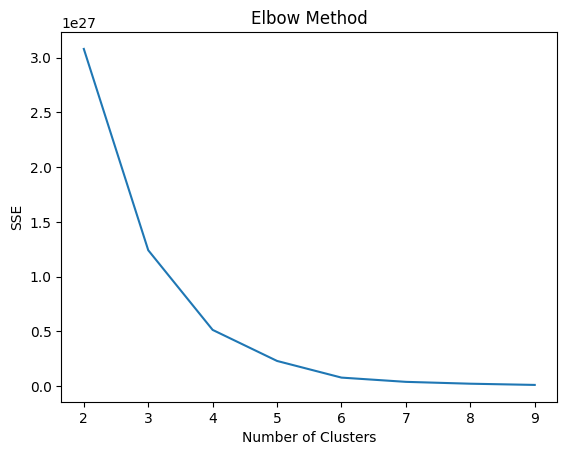

[[-1.01614236e-01 -1.02053556e-01 -1.01203368e-01 -1.01634760e-01
  -1.04522124e-01 -1.89844205e-01 -1.79420909e-01 -9.37262410e-02
   2.93000631e+10  7.62714443e+01  5.04225394e+01  6.89483056e+01
   6.59322231e+01  1.45952467e+01 -1.24750697e-01  1.43712172e-01
  -7.69424528e-02  2.24804350e-02 -1.46137436e-01 -1.80910418e-02
   2.02186305e+03  8.59717864e-04  7.19386708e-04 -1.46550358e-04
   6.27541780e+00  2.01330545e+00 -4.45468668e-04 -1.00701346e-01
  -9.91762955e-02 -4.57277623e-01 -2.03663797e-01]
 [ 7.61299732e-01  7.64355704e-01  7.58871913e-01  7.61798205e-01
   7.71541289e-01  1.33621026e+00  1.27374655e+00  3.56599779e-01
   3.14544506e+12  2.82113333e+02  1.72436667e+02  2.52475200e+02
   2.36151880e+02  2.90017447e+01 -1.25269597e-01 -1.16285171e+00
   1.11634910e+00 -6.17369497e-01  1.18973869e+00  5.45975284e-01
   2.02185349e+03 -7.23742328e-03 -6.05606366e-03  1.23371517e-03
   6.26575809e+00  2.02981261e+00  1.84028298e-03  7.51980663e-01
   7.36598093e-01  2.8573

In [35]:
'''# Elbow method to find optimal number of clusters
sse = []
for k in range(2, 10):  # You can adjust range
    # Create an instance of SimpleImputer to replace NaN with the mean
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on your data and transform it
    data_imputed = imputer.fit_transform(df)

    kmeans = KMeans(n_clusters=k)
    # Fit KMeans on the imputed data
    kmeans.fit(data_imputed)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 10), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Fit K-Means with the optimal number of clusters
optimal_k = 4  # Replace with the value obtained
kmeans = KMeans(n_clusters=optimal_k)

# Impute data before final fitting
data_imputed = imputer.fit_transform(df)

# Fit on imputed data and assign clusters
df['cluster'] = kmeans.fit_predict(data_imputed)

# Find centroids
centroids = kmeans.cluster_centers_
print(centroids)

# Portfolio Construction

Equally Weighted Portfolio

In [27]:
def equally_weighted_portfolio(centroids):
    num_assets = centroids.shape[0]  # Number of assets (clusters)
    weights = np.ones(num_assets) / num_assets  # Equal weight for each asset
    return weights

# Example usage
weights_equal = equally_weighted_portfolio(centroids)

Market-Cap Weighted Portfolio

In [28]:
def market_cap_weighted_portfolio(centroids, market_caps):
    total_market_cap = np.sum(market_caps)  # Sum of market caps
    weights = market_caps / total_market_cap  # Market cap weight for each cluster/centroid
    return weights

# Example usage with random market caps
market_caps = np.random.random(centroids.shape[0]) * 1000  # Replace with actual market cap data
weights_market_cap = market_cap_weighted_portfolio(centroids, market_caps)

Global Minimum Variance Portfolio

In [29]:
from scipy.optimize import minimize

def portfolio_volatility(weights, cov_matrix):
    """Calculates portfolio volatility."""
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def global_minimum_variance_portfolio(centroids):
    """Calculates the global minimum variance portfolio."""
    num_assets = centroids.shape[1]
    cov_matrix = np.cov(centroids.T)  # Covariance matrix of returns (centroids as cluster reps)

    initial_guess = np.ones(num_assets) / num_assets  # Equal weights initially
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  # Sum of weights = 1
    bounds = tuple((0, 1) for asset in range(num_assets))  # Weights between 0 and 1

    result = minimize(portfolio_volatility, initial_guess, args=(cov_matrix,), bounds=bounds, constraints=constraints)
    return result.x  # Optimized weights for minimum variance

# Example usage
weights_min_variance = global_minimum_variance_portfolio(centroids)

Maximum Sharpe Ratio Portfolio

In [30]:
def sharpe_ratio(weights, returns, cov_matrix):
    """Calculates the Sharpe ratio of a portfolio."""
    # Ensure returns is a column vector
    #returns = returns.reshape(-1, 1)

    portfolio_return = np.dot(weights.T, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility  # Negative for minimization

def max_sharpe_ratio_portfolio(centroids):
    """Calculates the portfolio with the maximum Sharpe ratio."""
    num_assets = centroids.shape[1]
    cov_matrix = np.cov(centroids.T)  # Covariance matrix of returns
    expected_returns = np.mean(centroids, axis=0)  # Mean return for each cluster

    # Ensure expected_returns is a column vector
    expected_returns = expected_returns.reshape(-1, 1)

    initial_guess = np.ones(num_assets) / num_assets  # Equal weights initially
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  # Sum of weights = 1
    bounds = tuple((0, 1) for asset in range(num_assets))  # Weights between 0 and 1

    result = minimize(sharpe_ratio, initial_guess, args=(expected_returns, cov_matrix), bounds=bounds, constraints=constraints)

    # Return the optimized weights
    return result.x

Construct the Four Portfolios

In [31]:
weights_max_sharpe = max_sharpe_ratio_portfolio(centroids)

portfolio_equal = weights_equal.reshape(-1, 1) * centroids
portfolio_market_cap = weights_market_cap.reshape(-1, 1) * centroids
portfolio_min_variance = weights_min_variance * centroids
portfolio_max_sharpe = centroids * weights_max_sharpe

# Example outputs:
print("Equally Weighted Portfolio:", portfolio_equal)
print("Market-Cap Weighted Portfolio:", portfolio_market_cap)
print("Global Minimum Variance Portfolio:", portfolio_min_variance)
print("Maximum Sharpe Ratio Portfolio:", portfolio_max_sharpe)

Equally Weighted Portfolio: [[-2.54035589e-02 -2.55133889e-02 -2.53008420e-02 -2.54086901e-02
  -2.61305310e-02 -4.74610514e-02 -4.48552274e-02 -2.34315603e-02
   7.32501577e+09  1.90678611e+01  1.26056349e+01  1.72370764e+01
   1.64830558e+01  3.64881168e+00 -3.11876743e-02  3.59280431e-02
  -1.92356132e-02  5.62010876e-03 -3.65343589e-02 -4.52276045e-03
   5.05465762e+02  2.14929466e-04  1.79846677e-04 -3.66375895e-05
   1.56885445e+00  5.03326363e-01 -1.11367167e-04 -2.51753365e-02
  -2.47940739e-02 -1.14319406e-01 -5.09159492e-02]
 [ 1.90324933e-01  1.91088926e-01  1.89717978e-01  1.90449551e-01
   1.92885322e-01  3.34052564e-01  3.18436637e-01  8.91499447e-02
   7.86361265e+11  7.05283333e+01  4.31091667e+01  6.31188000e+01
   5.90379700e+01  7.25043617e+00 -3.13173993e-02 -2.90712928e-01
   2.79087276e-01 -1.54342374e-01  2.97434673e-01  1.36493821e-01
   5.05463373e+02 -1.80935582e-03 -1.51401591e-03  3.08428794e-04
   1.56643952e+00  5.07453152e-01  4.60070745e-04  1.87995166e-

 Portfolio Weights Visualization

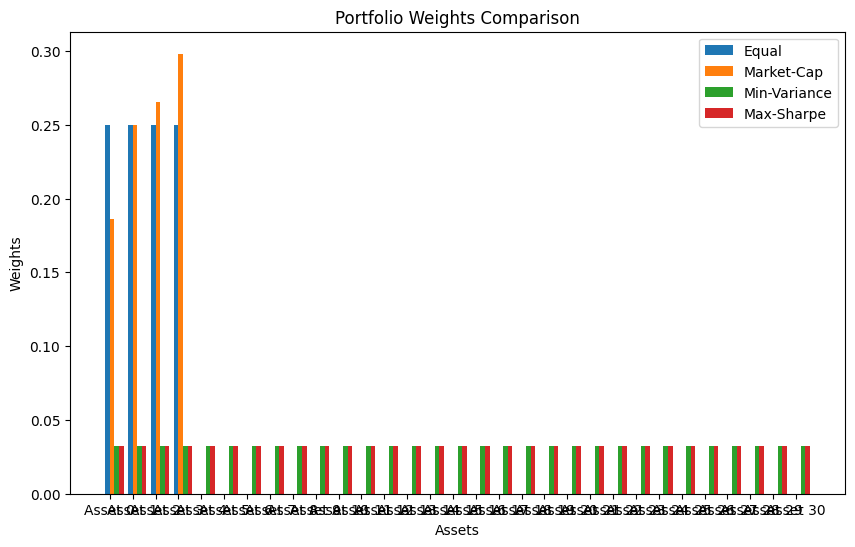

In [32]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy

def plot_portfolio_weights(portfolios, portfolio_names):
    """
    Plots the weights of different portfolios as a bar chart.
    Handles potential shape mismatches by truncating or padding weights.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Get the maximum number of assets among all portfolios
    num_assets = max(len(weights) for weights in portfolios)

    index = np.arange(num_assets)  # Use the maximum number of assets
    bar_width = 0.2

    for i, portfolio_weights in enumerate(portfolios):
        # Truncate or pad portfolio weights to match the maximum number of assets
        portfolio_weights = np.pad(portfolio_weights, (0, num_assets - len(portfolio_weights)), 'constant')[:num_assets]

        ax.bar(index + i * bar_width, portfolio_weights, width=bar_width, label=portfolio_names[i])

    ax.set_xlabel('Assets')
    ax.set_ylabel('Weights')
    ax.set_title('Portfolio Weights Comparison')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels([f'Asset {i}' for i in range(num_assets)])
    ax.legend()

    plt.show()

# Example
portfolios = [weights_equal, weights_market_cap, weights_min_variance, weights_max_sharpe]
portfolio_names = ['Equal', 'Market-Cap', 'Min-Variance', 'Max-Sharpe']
plot_portfolio_weights(portfolios, portfolio_names)

# Simulated Annealing Optimization

In [21]:
from scipy.optimize import minimize

def portfolio_return(weights, returns):
    return np.dot(weights, returns)

def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def optimize_portfolio(returns, cov_matrix):
    num_assets = len(returns)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  # Weights must sum to 1
    bounds = tuple((0, 1) for asset in range(num_assets))  # Weights between 0 and 1
    initial_guess = num_assets * [1. / num_assets]  # Equal weighting as initial guess

    result = minimize(objective_function, initial_guess, args=(returns, cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x  # Optimized weights

# LSTM for Forecasting and Portfolio Prediction

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Preparing the data (use centroids as input)
def prepare_lstm_data(data, time_step=1):
    X, y = [], []
    # Check if enough data for time_step
    if len(data) <= time_step + 1:
        raise ValueError("Insufficient data for the specified time_step. "
                         "Provide data with more than time_step + 1 rows.")
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

# Adjusted time_step based on available data
time_step = 2  # Reduced time_step to accommodate the limited data

# Ensure centroids has enough data (more than time_step + 1)
if centroids.shape[0] <= time_step + 1:
    # If centroids is too small, handle it appropriately
    # For example, you could generate more synthetic data or reduce time_step further.
    raise ValueError("centroids data is too small for the chosen time_step.")

X, y = prepare_lstm_data(centroids, time_step)

# Defining LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, centroids.shape[1])))
model.add(LSTM(units=50))
model.add(Dense(centroids.shape[1]))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=64, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 129441965093923785277440.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 129441965093923785277440.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 129441965093923785277440.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 129441965093923785277440.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 129441965093923785277440.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 129441965093923785277440.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 129441965093923785277440.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 129441965093923785277440.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 129441965093923785277440.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 129441965093923785277440.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 129441965093923785277440.0000
Epoch 12/100
1/1 ━━━━━━━━━━━━

LSTM Prediction vs. Actual Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


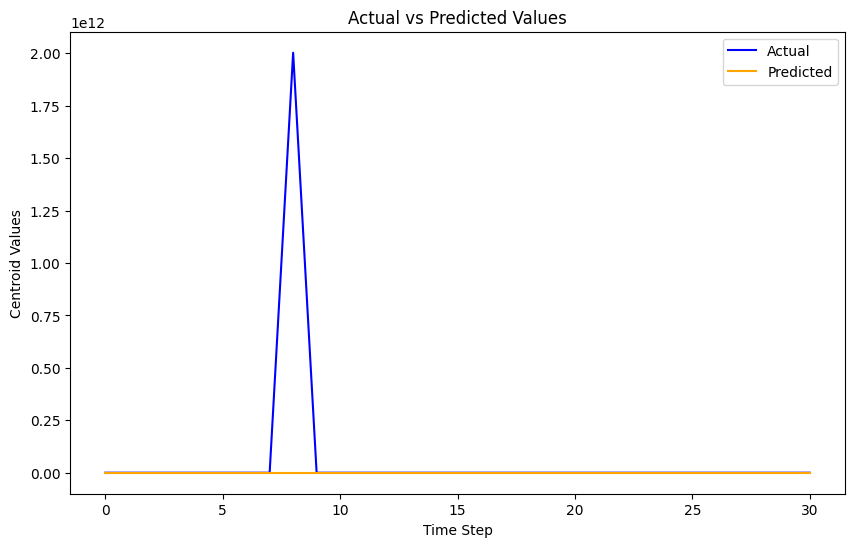

In [23]:
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true.flatten(), label="Actual", color='blue')
    plt.plot(y_pred.flatten(), label="Predicted", color='orange')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Time Step')
    plt.ylabel('Centroid Values')
    plt.legend()
    plt.show()

# Example usage
predicted = model.predict(X)
plot_predictions(y, predicted)